Sample data inserted.

=== SALES SUMMARY ===
    product  total_quantity  total_revenue
0  Keyboard              17        20400.0
1    Laptop               8       440000.0
2   Monitor              10        90000.0
3     Mouse              20        10000.0


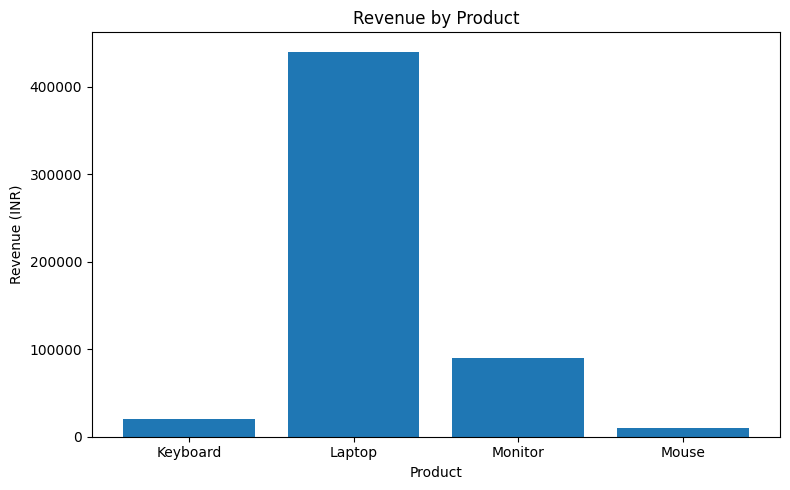

In [1]:
# Cell A: create DB, insert sample data, run SQL, show chart
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

DB = "sales_data.db"
conn = sqlite3.connect(DB)
cur = conn.cursor()

cur.execute("""
CREATE TABLE IF NOT EXISTS sales (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  product TEXT,
  quantity INTEGER,
  price REAL
)
""")
conn.commit()

# insert sample rows only if empty
cur.execute("SELECT COUNT(*) FROM sales")
if cur.fetchone()[0] == 0:
    sample = [
      ("Laptop", 5, 55000),
      ("Laptop", 3, 55000),
      ("Mouse", 20, 500),
      ("Keyboard", 10, 1200),
      ("Keyboard", 7, 1200),
      ("Monitor", 4, 9000),
      ("Monitor", 6, 9000)
    ]
    cur.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample)
    conn.commit()
    print("Sample data inserted.")
else:
    print("Table already has data.")

query = """
SELECT product,
       SUM(quantity) AS total_quantity,
       SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
print("\n=== SALES SUMMARY ===")
print(df)
conn.close()

# plot and save
plt.figure(figsize=(8,5))
plt.bar(df["product"], df["total_revenue"])
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (INR)")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


In [2]:
from google.colab import files
files.download("sales_data.db")
files.download("sales_chart.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>